# 6. Programmierübung: Monte Carlo Simulationen

<div style="display:flex;">
    <div style="text-align: left">
        Willkommen zur sechsten Programmierübung Einführung in Python 3.
    </div>
    <img style="float: right; margin: 0px 15px 15px 0px" src="https://www.python.org/static/img/python-logo-large.c36dccadd999.png?1576869008" width="100" />
</div>

Wenn Sie Fragen oder Verbesserungsvorschläge zum Inhalt oder Struktur der Notebooks haben, dann können sie eine E-Mail an Phil Keier ([p.keier@hbk-bs.de](mailto:p.keier@hbk-bs.de?subject=[SigSys]%20Feedback%20Programmierübung&amp)) oder Martin Le ([martin.le@tu-bs.de](mailto:martin.le@tu-bs.de?subject=[SigSys]%20Feedback%20Programmierübung&amp)) schreiben.

Link zu einem Python Spickzettel: [hier](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf)

Der Großteil des Python-Tutorials stammt aus der Veranstaltung _Deep Learning Lab_ und von [www.python-kurs.eu](https://www.python-kurs.eu/python3_kurs.php) und wurde für _Signale und Systeme_, sowie _Einführung in die Programmierung für Nicht Informatiker_ angepasst.

---

## (Continues) Uniform Distribution

Die gleichmäßige Verteilung zeigt sich durch ihre Charakteristische Form eines Rechteckes mit Flächeninhalt 1 = 100%. 
Technisch gesehen ist diese Form der Verteilung bereits bekannt da PCGs dieser folgen.

Eine Uniform Distribution setzt sich aus den selben zwei Parametern zusammen wie die Normalverteilung, $\mu$ der Mittelwert und $\sigma$ die Standardabweichung vom Mittelwert. 

Jedoch nehmen die Libraries NumPy & SciPy die Werte anders auf, $\mu$ ist hierbei der kleinste Wert und $\sigma$ der Größte Wert.

Folgende Grafik verdeutlicht die Verteilung mit $\mu=0$ & $\sigma=1$:

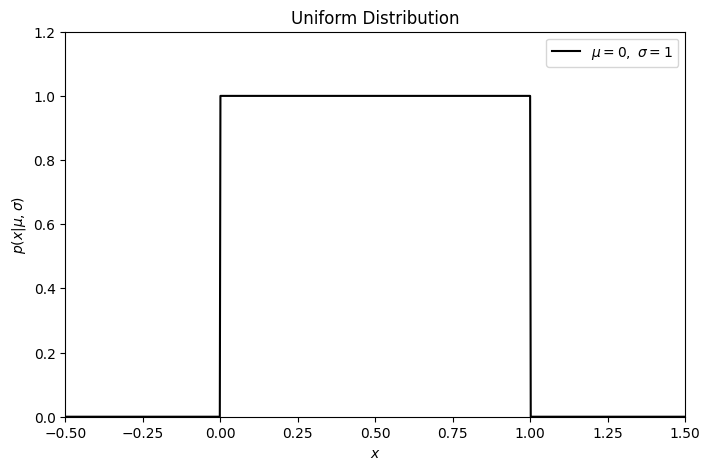

In [71]:
import numpy as np
from scipy.stats import uniform # Import scipys uniform
import matplotlib.pyplot as plt

# Define the distribution parameters to be plotted
sigma = 1
mu = 0
x = np.linspace(-0.5, 1.5, 1000)


# plot the distributions
fig, ax = plt.subplots(figsize=(8, 5))

dist = uniform(mu, sigma)

plt.plot(x, dist.pdf(x), c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))

plt.xlim(-0.5, 1.5)
plt.ylim(0, 1.2)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu, \sigma)$')
plt.title('Uniform Distribution')

plt.legend()
plt.show()

## Random Sampling

Wie man von Verteilungen sampled ist bereits bekannt aus dem Kapitel zu den PCGs diese sind uniformiert verteilt.

Folgendes Beispiel zieht 3 zufällige Zahlen aus einer PCG uniformierten Verteilung mittels NumPy:

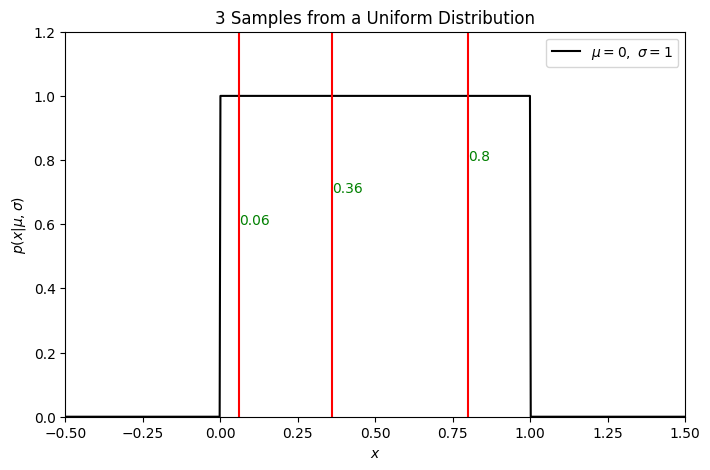

In [115]:
# Parameters
mu = 0
sigma = 1

# Get a 3 random samples
rand = np.random.default_rng(5000)
uniform_samples = rand.uniform(mu, sigma, 3)

# Linespace
x = np.linspace(-0.5, 2, 1000)

# Get uniform from linespace
dist = uniform(mu, sigma)

# Plot Uniform
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(x, dist.pdf(x), c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))

# Plot samples
step = 0.1
for u in uniform_samples:
    u = np.round(u, decimals=2)
    plt.axvline(u, color='r')
    plt.text(u, .5+step, u, color='g')
    step += 0.1

# Cosmetics
plt.xlim(-0.5, 1.5)
plt.ylim(0, 1.2)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu, \sigma)$')
plt.title('3 Samples from a Uniform Distribution')

plt.legend()
plt.show()

Random sampling funktioniert auch auf Normalverteilungen. Beispiel:

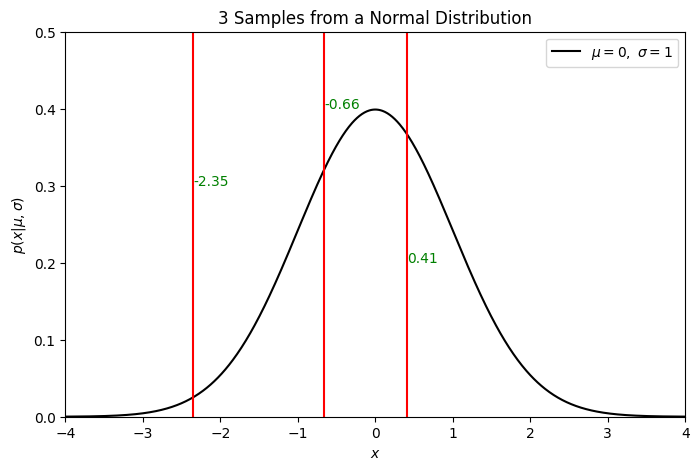

In [126]:
# Import scipys norm
from scipy.stats import norm 

#Parameters
mu = 0
sigma = 1

# Get a 3 random samples
rand = np.random.default_rng(5000)
uniform_samples = rand.normal(mu, sigma, 3)

# Linespace
x = np.linspace(-4, 4, 1000)

# Get uniform from linespace
dist = norm(mu, sigma)

# Plot Uniform
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(x, dist.pdf(x), c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))

# Plot samples
step = 0.1
for u in uniform_samples:
    u = np.round(u, decimals=2)
    plt.axvline(u, color='r')
    plt.text(u, .1+step, u, color='g')
    step += 0.1

# Cosmetics
plt.xlim(-4, 4)
plt.ylim(0, .5)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu, \sigma)$')
plt.title('3 Samples from a Normal Distribution')

plt.legend()
plt.show()

## Monte Carlo Simulationen

Monte Carlo Simulationen werden in viel Wissenschaftlichen & Finzanziellen (Forschungs-)Feldern angewandt um Stochhastisch relevante Ergebnisse einfach zu lösen. Damit lassen sich insbesondere Zufallsereignisse verschiedenster Verteilungen mit einander Kombinieren. So lässt sich Beispielweise die Zahl $\pi$ approximieren.

Dazu betrachte folgende Darstellung:

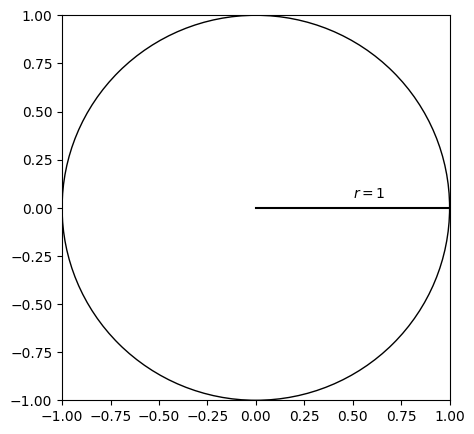

In [156]:
circle = plt.Circle((0, 0), 1, color='black', fill=False)
fig, ax = plt.subplots(figsize=(5,5))
ax.add_patch(circle)
ax.plot(np.linspace(0,1), np.zeros(50), color='black')
ax.text(0.5, 0.05, "$r = 1$")

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()

Vorliegend der Einheitskreis mit Radius=1 dieser hat den Flächeninhalt $A_{circle} = \pi$. Das Umgebende Rechteck hat die Seitenlänge $a=r*2=2$ darauß ergibt sich ein Flächeninhalt $A_{square}=2*2=4$. Daraus ergibt sich die Differenz $$\frac{A_{circle}}{A_{square}} = \frac{\pi}{4}$$

Jeder Punkt $(x,y)$ in dem Diagramm ist gleichwahrscheinlich, also uniform Verteilt. Mittels Monte Carlo können wir nun den Wert von $\pi$ bestimmen. Nach Umstellen ergibt sich: $$\pi = 4 \cdot \frac{A_{circle}}{A_{square}}$$

Nacheinander werden folgend zufällig gleichverteilte x,y Werte gezogen.

Für das Beispiel nutzen wir sehr wenig Werte um die Darstellung nicht zu verunstalten:

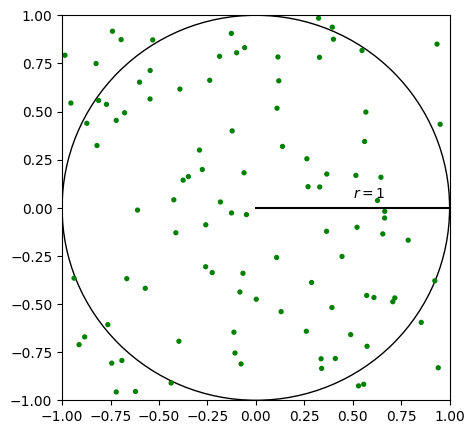

In [159]:
# Get Uniform x, y samples
rand = np.random.default_rng(42) # Set fixed Value
x_rand = rand.uniform(-1, 1, 100)
y_rand = rand.uniform(-1, 1, 100)

# Plot 
circle = plt.Circle((0, 0), 1, color='black', fill=False)
fig, ax = plt.subplots(figsize=(5,5))
ax.add_patch(circle)
ax.plot(np.linspace(0,1), np.zeros(50), color='black')
ax.text(0.5, 0.05, "$r = 1$")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot samples as small circles
for x, y in zip(x_rand, y_rand):
    c = plt.Circle((x,y), 0.01, color='green')
    ax.add_patch(c)

plt.show()

Um zu bestimmen ob einer der Werte im Kreis liegt Nutzen wir die parametrisierte Kreisgleichung: $$x^2+y^2=r,\quad r=1$$
Mittels dieser lassen sich die Werte sortieren nach "im Kreis `circle`" & "im Rechteck `square`":

In [170]:
# reserve two arrays
circle_coords = []
square_coords = []

for x,y in zip(x_rand, y_rand):
    # calculate distance from origin
    dist_from_origin = x**2 + y**2

    # if distance smaller or equal than 1, the point is in the circle
    if dist_from_origin <= 1:
        circle_coords.append((x,y))

    # by definition is every point in the square
    square_coords.append((x,y))

Mittels der länge der Listen lässt sich dementsprechend $\pi$ approxiemieren:

In [171]:
pi = 4 * len(circle_coords) / len(square_coords)
print(f"Pi = {pi}")
print(f"Difference to real Value {np.pi - pi}")

Pi = 3.12
Difference to real Value 0.02159265358979301


Plotten wir im folgenden die 100 zufällig gleichverteilten Werte:

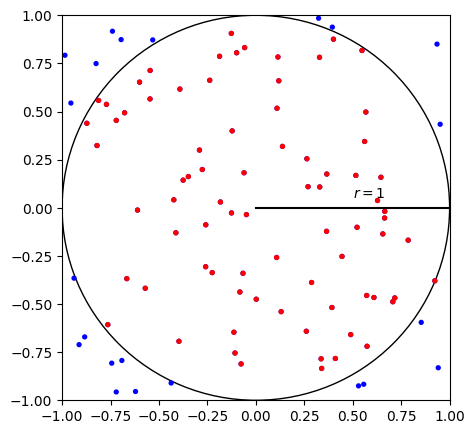

In [172]:
# Plot 
circle = plt.Circle((0, 0), 1, color='black', fill=False)
fig, ax = plt.subplots(figsize=(5,5))
ax.add_patch(circle)
ax.plot(np.linspace(0,1), np.zeros(50), color='black')
ax.text(0.5, 0.05, "$r = 1$")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot samples not in the circle
for coord in square_coords:
    c = plt.Circle(coord, 0.01, color='blue')
    ax.add_patch(c)

# Plot samples in the circle
for coord in circle_coords:
    c = plt.Circle(coord, 0.01, color='red')
    ax.add_patch(c)

plt.show()

Um einen genaueren Wert für $\pi$ zu erhalten muss dementsprechend nur die Anzahl an Samples erhöht werden (Hier 1 Million).

Da im folgenden auf einen Plot verzichtet wird lässt sich die Berechnung darauf vereinfachen, dass nur gezählt werden muss welche Punkte im Kreis liegen die koordinaten sind nicht mehr vom Nutzen:

In [174]:
# Get Uniform x, y samples
sample_size = 1_000_000
rand = np.random.default_rng(42) # Set fixed Value
x_rand = rand.uniform(-1, 1, sample_size)
y_rand = rand.uniform(-1, 1, sample_size)

# reserve two arrays
in_circle = 0
in_square = 0

for x,y in zip(x_rand, y_rand):
    # calculate distance from origin
    dist_from_origin = x**2 + y**2

    # if distance smaller or equal than 1, the point is in the circle
    if dist_from_origin <= 1:
        in_circle += 1

    # by definition is every point in the square
    in_square += 1

pi = 4 * in_circle / in_square
print(f"Pi = {pi}")
print(f"Difference to real Value {np.pi - pi}")

Pi = 3.14178
Difference to real Value -0.00018734641020667908


### Aufgabe - Arbeitszeit abschätzen

*7 Punkte*

Du befindest dich in der Situation wieder das dein Chef dich damit Beauftragt zwei wichtige Aufgaben bis zum Ende des Arbeitstages zu bearbeiten. Im Gegennsatz dazu bist du Abends auf einem Grillfest mit deinen Freunden verabredet. Dieses findet um 18 Uhr statt. Da du dich nun im zwiespalt befindest deinen Beruflichen Aufgaben nachzukommen und auf dem Grillfest zu erscheinen, fragst du dich im nächsten Schritt wie hoch die Chance ist, dass in 9 Stunden anstehende Grillfest pünktlich zu erreichen und gleichzeitig deinen Beruflichen Verpflichtungen nachzukommen.

Nach einigen gut durchdachten Überlegungen stellst du folgendes fest:

- An der ersten Aufgabe sitzt du zwischen 1-5 Stunden.
- An der zweiten Aufgabe sitzt du zwischen 2-6 Stunden.
- Egal wie schnell du eine Aufgabe löst es gibt keine Auswirkungen auf die andere Aufgabe. (Sie sind unabhängig voneinander)

Stell im folgenden fest wie hoch die Warscheinlichkeit ist das du pünktlich beim Grillfest angelangst.

Gehe dabei wie folgt vor:

- Nehme an das beide Aufgaben gleichmäßig Verteilt sind, und speichere die Verteilungen in den Variablen `exc1` & `exc2`.
- Verwende eine geeignete Anzahl an samples. Speichere den gewählten Wert in der variablen `sims`.
- Speichere die Wahrscheinlichkeit mit der du es zum Grillfest schaffst in der Variablen `chance`, mit einer genauigkeit von zwei nachkommmastellen.
- Plotte geeignet. Beziehe auch die Variable `chance` mit ein.

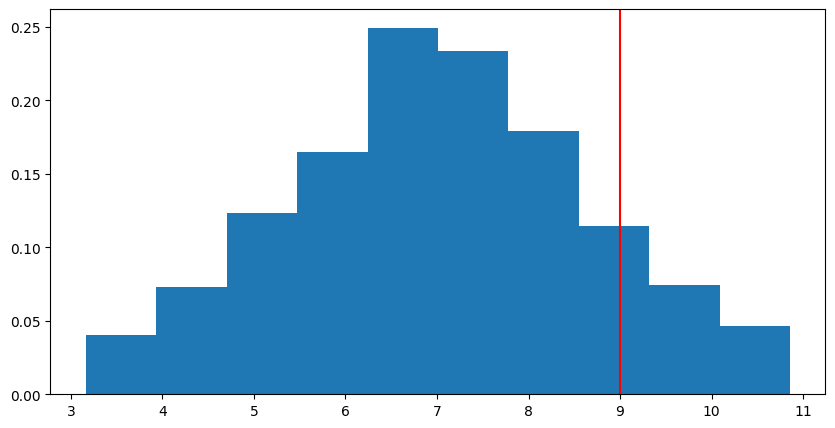

In [29]:
import numpy as np
rand = np.random.default_rng(42) # Use this rng!
# BEGIN SOLUTION
import matplotlib.pyplot as plt
sims = 1_000 # 1 Punkt

# 2 Punkte
exc1 = rand.uniform(1,5,sims) 
exc2 = rand.uniform(2,6,sims)

duration = exc1 + exc2 # 1 Punkt
chance = float(np.round((duration > 9).sum()/sims, decimals=2)) # 1 Punkt

plt.figure(figsize=(10,5))
plt.hist(duration, density=True) # 1 Punkt
plt.axvline(9, color='r') # 1 Punkt
plt.show()
# END SOLUTION

In [40]:
# Hier werden ihre Lösungen getestet...
import math
assert math.isclose(chance, 0.13, rel_tol=0.1)

### BEGIN HIDDEN TESTS
assert sims > 999
assert sims < 10_000_000

trand = np.random.default_rng(42)

texc1 = trand.uniform(1,5,sims) 
texc2 = trand.uniform(2,6,sims)

assert np.array_equal(exc1, texc1)
assert np.array_equal(exc2, texc2)
### END HIDDEN TESTS

### Aufgabe - Simulation einer Körpergewichtszunahme

*13 Punkte*

Gegeben sind die nach Altersgruppe aufgeschlüsselten Durschnittskörpergewichte (in kg) von Männern in Deutschland. (Zu finden beim [Statistischen Bundesamt](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Gesundheit/Gesundheitszustand-Relevantes-Verhalten/Tabellen/koerpermasse-maenner.html))

Nutze die Monte Carlo Methode um den mittleren Gewichtszuwachs der Bezugsgrößen zu bestimmen.
Die mittlere Gewichtsschwankung eines Durschnittsmannes beträgt 2.5kg über den Tag verteilt. 
Finde die Wahrscheinlichkeit mit der ein Durchschnittsmann pro Woche (7 Tage) 3 kilogramm abnimmt und speichere das Ergebniss in der Variablen `gain_percent`.

Beachte:

- Bestimmt das arithmetische Mittel der Durchschnittsgewichte über die Altersgruppen. Speichere den Wert in `avg_weight` mit einer Präsizion von 1 Dezimalstelle.
- Verwende eine geeignete Anzahl an samples. Speichere den gewählten Wert in der variablen `sims`.
- Nehme an das das Durchschnittsgewicht Normal Verteilt ist und mit einer Standardabweichung von 5% zum Durschnittswert. Speichere deine Samples in der Variablen `men_normal`.
- Nehme an das die Gewichtsschwankung pro Tag Gleich Verteilt ist. Speichere die simulierten zunahmen für eine Woche in der Liste `gain_week`.
- Berechne die Durschnittliche Gewichtszunahme/abnahme und speichere das Ergebnis in der Variablen `duration`.
- Plotte Angemessen. Beziehe dabei alle relevanten Werte mit ein.
- Begründe mit einem kurzen Text dein Vorgehen und erkläre dein Ergebnis, beschreibe als letztes die Aussage deines Plottes.

In [93]:
# Given
avg_weight_per_men = {
    "18 - 20": 77.9,
    "20 - 25": 80.5,
    "25 - 30": 83.3,
    "30 - 35": 85.6,
    "35 - 40": 86.7,
    "40 - 45": 88.1,
    "45 - 50": 89.8,
    "50 - 55": 89.0,
    "55 - 60": 88.8,
    "60 - 65": 87.9,
    "65 - 70": 86.7,
    "70 - 75": 85.3,
    "75+": 81.0
}

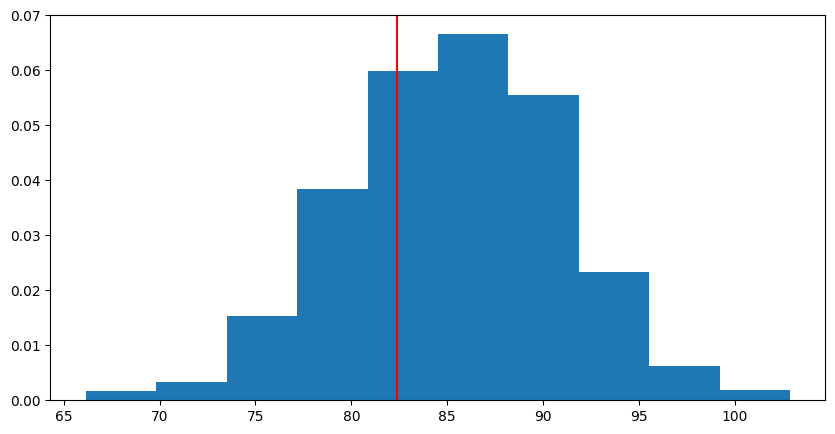

0.31


In [88]:
rand = np.random.default_rng(420) # Use this rng!

# BEGIN SOLUTION
avg_weight = np.round(np.mean(list(avg_weight_per_men.values())), decimals=1) # 1 Punkt

sims = 1_000 # 1 Punkt

# 3 Punkte
sigma = np.round(avg_weight * 0.05, decimals=1)
men = rand.normal(avg_weight, sigma, sims)
gain_week = [
    rand.uniform(-2.5, 2.5, sims)
    for _ in range(7)
]

# Sum up 2 Punkte
duration = np.zeros(sims)
for gain in gain_week:
    duration += gain
duration += men

gain_percent = float(np.round((duration < avg_weight-3).sum()/sims, decimals=2)) # 1 Punkt

plt.figure(figsize=(10,5))
plt.hist(duration, density=True) # 1 Punkt
plt.axvline(avg_weight-3, color='r') # 1 Punkt
plt.show()
print(gain_percent)
# END SOLUTION

**Begründe dein Vorgehen:**

**Erkläre dein Ergebnis:**

**Interpretiere & Erkläre deinen Plot:**

In [94]:
# Hier werden ihre Lösungen getestet...
import math
assert math.isclose(float(gain_percent), 0.3, rel_tol=0.1)

### BEGIN HIDDEN TESTS
assert sims > 499
assert sims < 2_001

trand = np.random.default_rng(420)

t_sigma = np.round(avg_weight * 0.05, decimals=1)
t_men = trand.normal(avg_weight, sigma, sims)
t_gain_week = [
    trand.uniform(-2.5, 2.5, sims)
    for _ in range(7)
]

assert math.isclose(sigma, t_sigma, rel_tol=0.1)

for el1, el2 in zip(gain_week, t_gain_week):
    assert np.array_equal(el1, el2)

assert np.array_equal(t_men, men)

t_duration = np.zeros(sims)
for gain in t_gain_week:
    t_duration += gain
t_duration += t_men

assert np.array_equal(t_duration, duration)
### END HIDDEN TESTS